In [91]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing and Splitting Diabetes Training set

Shapes:

X_train: (614, 8)

X_test: (77, 8)

X_val: (77, 8)

y_train:(614,1)

y_test:(77,1)

y_val:(77,1)

In [47]:
official_diabetes = pd.read_csv("diabetes.csv")
official_diabetes
X = official_diabetes[["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = official_diabetes[["Outcome"]]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


### Classification without pre-processing 

In [52]:
from sklearn.linear_model import LogisticRegression
#Instantiating Logistic Regression
Logistic_model = LogisticRegression()

Logistic_model.fit(X_train, y_train)


y_pred_logistic = Logistic_model.predict(X_test)


In [99]:
# Metrics
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve
logistic_f1_score = f1_score(y_pred_logistic,y_test)
logistic_roc_score = roc_auc_score(y_pred_logistic,y_test)
Logistic_score = Logistic_model.score(X_test, y_test)


print("Accuracy is: "+str(Logistic_score*100)+"%")
print("F1 score is: "+str(logistic_f1_score))
print("ROC score is: "+str(logistic_roc_score))

Accuracy is: 72.72727272727273%
F1 score is: 0.6666666666666666
ROC score is: 0.7159090909090908


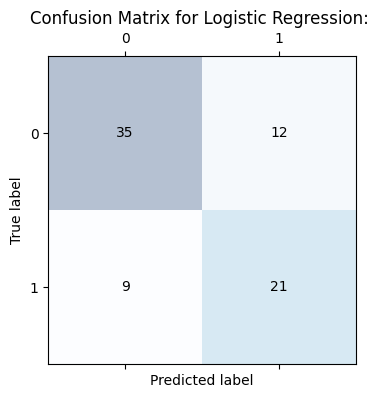

In [100]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_logistic)

fig, ax = plt.subplots(figsize=(4,4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Confusion Matrix for Logistic Regression: ")

plt.show()

In [56]:
from sklearn import svm

SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train)

y_pred_svm = SVM_model.predict(X_test)

svm_f1_score = f1_score(y_pred_svm,y_test)
svm_roc_score = roc_auc_score(y_pred_svm,y_test)
svm_score = SVM_model.score(X_test, y_test)

print("Accuracy is: "+str(svm_score*100)+"%")
print("F1 score is: "+str(svm_f1_score))
print("ROC score is: "+str(svm_roc_score))

Accuracy is: 75.32467532467533%
F1 score is: 0.6415094339622641
ROC score is: 0.749194847020934


In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

y_pred_gnb = GNB_model.predict(X_test)

gnb_f1_score = f1_score(y_pred_gnb,y_test)
gnb_roc_score = roc_auc_score(y_pred_gnb,y_test)
gnb_score = GNB_model.score(X_test, y_test)

print("Accuracy is: "+str(gnb_score*100)+"%")
print("F1 score is: "+str(gnb_f1_score))
print("ROC score is: "+str(gnb_roc_score))

MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)

y_pred_mnb = MNB_model.predict(X_test)

mnb_f1_score = f1_score(y_pred_mnb,y_test)
mnb_roc_score = roc_auc_score(y_pred_mnb,y_test)
mnb_score = MNB_model.score(X_test, y_test)
print("")
print("Accuracy is: "+str(mnb_score*100)+"%")
print("F1 score is: "+str(mnb_f1_score))
print("ROC score is: "+str(mnb_roc_score))


Accuracy is: 75.32467532467533%
F1 score is: 0.6885245901639343
ROC score is: 0.740883590462833

Accuracy is: 66.23376623376623%
F1 score is: 0.5357142857142857
ROC score is: 0.6414027149321266


In [60]:
from sklearn.linear_model import SGDClassifier
SGD_model = SGDClassifier()

SGD_model.fit(X_train, y_train)

y_pred_sgd = SGD_model.predict(X_test)

sgd_f1_score = f1_score(y_pred_sgd,y_test)
sgd_roc_score = roc_auc_score(y_pred_sgd,y_test)
sgd_score = SGD_model.score(X_test, y_test)

print("Accuracy is: "+str(sgd_score*100)+"%")
print("F1 score is: "+str(sgd_f1_score))
print("ROC score is: "+str(sgd_roc_score))


Accuracy is: 62.33766233766234%
F1 score is: 0.6329113924050633
ROC score is: 0.6658163265306122


In [62]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()

KNN_model.fit(X_train, y_train)

y_pred_knn = KNN_model.predict(X_test)

knn_f1_score = f1_score(y_pred_knn,y_test)
knn_roc_score = roc_auc_score(y_pred_knn,y_test)
knn_score = KNN_model.score(X_test, y_test)

print("Accuracy is: "+str(knn_score*100)+"%")
print("F1 score is: "+str(knn_f1_score))
print("ROC score is: "+str(knn_roc_score))

Accuracy is: 63.63636363636363%
F1 score is: 0.5757575757575758
ROC score is: 0.6297425474254742


In [81]:
from lightgbm import LGBMClassifier
params = {'objective': 'binary',
'boosting_type': 'gbdt',
'num_leaves': 40,
'learning_rate': 0.1,
'feature_fraction': 0.4}
lgb_model = LGBMClassifier(**params)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

lgb_f1_score = f1_score(y_pred_lgb,y_test)
lgb_roc_score = roc_auc_score(y_pred_lgb,y_test)
lgb_score = lgb_model.score(X_test, y_test)

print("Accuracy is: "+str(lgb_score*100)+"%")
print("F1 score is: "+str(lgb_f1_score))
print("ROC score is: "+str(lgb_roc_score))

#Accuracy is: 75.32467532467533%
#F1 score is: 0.6885245901639343
#ROC score is: 0.740883590462833

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [86]:
from xgboost.sklearn import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

xgb_f1_score = f1_score(y_pred_xgb,y_test)
xgb_roc_score = roc_auc_score(y_pred_xgb,y_test)
xgb_score = xgb_model.score(X_test, y_test)

print("Accuracy is: "+str(xgb_score*100)+"%")
print("F1 score is: "+str(xgb_f1_score))
print("ROC score is: "+str(xgb_roc_score))


Accuracy is: 70.12987012987013%
F1 score is: 0.6461538461538462
ROC score is: 0.6928571428571428


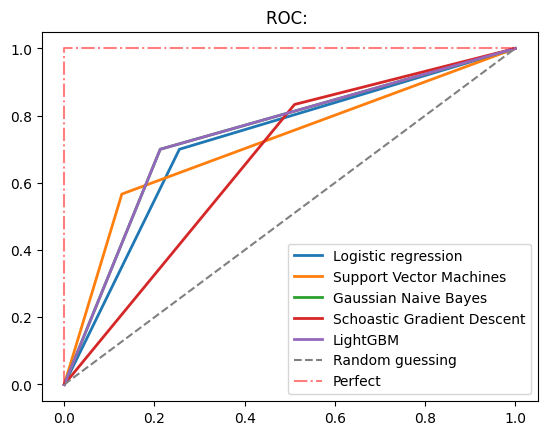

In [113]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logistic)
plt.plot(fpr, tpr, lw=2, label='Logistic regression')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
plt.plot(fpr, tpr, lw=2, label='Support Vector Machines')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_gnb)
plt.plot(fpr, tpr, lw=2, label='Gaussian Naive Bayes')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_sgd)
plt.plot(fpr, tpr, lw=2, label='Schoastic Gradient Descent')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgb)
plt.plot(fpr, tpr, lw=2, label='LightGBM')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color='gray',
         label='Random guessing')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle='-.',
         alpha=0.5,
         color='red',
         label='Perfect')
plt.title("ROC: ")
plt.legend()
plt.show()

## Pre-processing

In [118]:
# Check for missing values:
official_diabetes.isna().sum()

#Standard Variance of each column:
official_diabetes.var(ddof=0) # ddof: Delta degree of freedom

Pregnancies                    11.339272
Glucose                      1020.917262
BloodPressure                 374.159449
SkinThickness                 254.141900
Insulin                     13263.886875
BMI                            62.079046
DiabetesPedigreeFunction        0.109636
Age                           138.122964
Outcome                         0.227186
dtype: float64

In [172]:
#Standard Scalar

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

from sklearn.preprocessing import Normalizer, MinMaxScaler

norm = Normalizer()


min_max_scaler = MinMaxScaler()


official_diabetes_ss_X = ss.fit_transform(X)
print(official_diabetes_ss_X.var(ddof=0))

1.0


In [173]:
X_train_ss, X_temp_ss, y_train_ss, y_temp_ss = train_test_split(official_diabetes_ss_X, y, test_size=0.2, random_state=42)
X_val_ss, X_test_ss, y_val_ss, y_test_ss = train_test_split(X_temp_ss, y_temp_ss, test_size=0.5, random_state=42)

In [174]:
Logistic_model = LogisticRegression()

Logistic_model.fit(X_train_ss, y_train_ss)

y_pred_logistic_ss = Logistic_model.predict(X_test_ss)

logistic_f1_score_ss = f1_score(y_pred_logistic_ss,y_test_ss)
logistic_roc_score_ss = roc_auc_score(y_pred_logistic_ss,y_test_ss)
Logistic_score_ss = Logistic_model.score(X_test_ss, y_test_ss)


print("Accuracy is: "+str(Logistic_score_ss*100)+"%")
print("F1 score is: "+str(logistic_f1_score_ss))
print("ROC score is: "+str(logistic_roc_score_ss))

Accuracy is: 72.72727272727273%
F1 score is: 0.6666666666666666
ROC score is: 0.7159090909090908


# Tensorflow Sequential Model

In [184]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Dense(256, input_shape=(8,), activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer=Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_ss, y_train_ss, epochs=50, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test_ss, y_test_ss)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6672 - loss: 0.6127 - val_accuracy: 0.7561 - val_loss: 0.5102
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7817 - loss: 0.4779 - val_accuracy: 0.7561 - val_loss: 0.4757
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7860 - loss: 0.4503 - val_accuracy: 0.7561 - val_loss: 0.4788
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8105 - loss: 0.4145 - val_accuracy: 0.7561 - val_loss: 0.4751
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8090 - loss: 0.4131 - val_accuracy: 0.7561 - val_loss: 0.4761
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8081 - loss: 0.4105 - val_accuracy: 0.7724 - val_loss: 0.4725
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8231 - loss: 0.4016 - val_accuracy: 0.7398 - val_loss: 0.4780
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8169 - loss: 0.4045 - val_accuracy: 0.7480 - val_loss:

# Final Conclusions:


The Best Results were given by the Tensorflow Neural Network(77%)

All of the Sci-kit learn modules resulted in very similar results:

With this data, Pre-Processing had very minimal improvements to the data. Catagorical Data will definetely benefit more from pre-processing techniques.
